1. Zidentyfikuj w zbiorze Credit approval dataset cechy (tj. kolumny), dla których
brakuje podanych wartości. Uzupełnij brakujące wartości. Do wyboru jest wiele
możliwości, przykładowe z nich to:
• usunięcie kolumn (cech) lub wierszy (przykładów), w których występują
brakujące dane
• uzupełnienie brakujących danych średnią, medianą lub modą wartości
cechy
• uzupełnienie brakujących danych najczęstszą wartością cech, wartością
losową lub wartością zerową
• uzupełnienie brakujących danych metodą nabliższych sąsiadów
Zastanów się, jaki sposób imputacji brakujących danych będzie najbardziej
odpowiedni. Jak będzie wyglądało uzupełnianie brakujących wartości dla
danych numerycznych, a jak dla danych nominalnych?

In [90]:
import numpy as np
import pandas as pd

# Read the data
data = pd.read_csv("crx.data.csv", header=None)

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [91]:
# show all categorical variables in columns 0, 3, 4, 5, 6
for i in [0, 3, 4, 5, 6]:
    print(data[i].unique())

# replace ? with NaN
data = data.replace('?', np.nan)

['b' 'a' '?']
['u' 'y' '?' 'l']
['g' 'p' '?' 'gg']
['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' '?']
['v' 'h' 'bb' 'ff' 'j' 'z' '?' 'o' 'dd' 'n']


In [92]:
# make 13th column as int (continous), but leave NaN as NaN
data[13] = pd.to_numeric(data[13], errors='coerce')

In [93]:
# # plot data distribution

# import matplotlib.pyplot as plt
# import seaborn as sns

# # plot the distribution of each feature
# fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))
# for i, ax in enumerate(axes.flatten()):
#     sns.countplot(x=i, data=data, ax=ax)
#     ax.set_title(data.columns[i])
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#     ax.set_xlabel('')

# plt.tight_layout()


In [94]:
# delete the rows with missing values in columns 0, 3, 4, 5, 6
data = data.dropna(subset=[0, 3, 4, 5, 6])

# fill the missing numerical values with the median of the column
data = data.fillna(data.median())

data.isnull().sum()

C:\Users\kappa\AppData\Local\Temp\ipykernel_19220\1237372716.py:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.median())


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

2. Zwizualizuj rozkład wartości każdej cechy oraz zależności od innych cechw tzw.
macierzy rozrzutu (ang. scatter matrix).

C:\Users\kappa\AppData\Local\Temp\ipykernel_19220\2865607672.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i], ax=ax)
C:\Users\kappa\AppData\Local\Temp\ipykernel_19220\2865607672.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i], ax=ax)
C:\Users\kappa\AppData\Local\Temp\ip

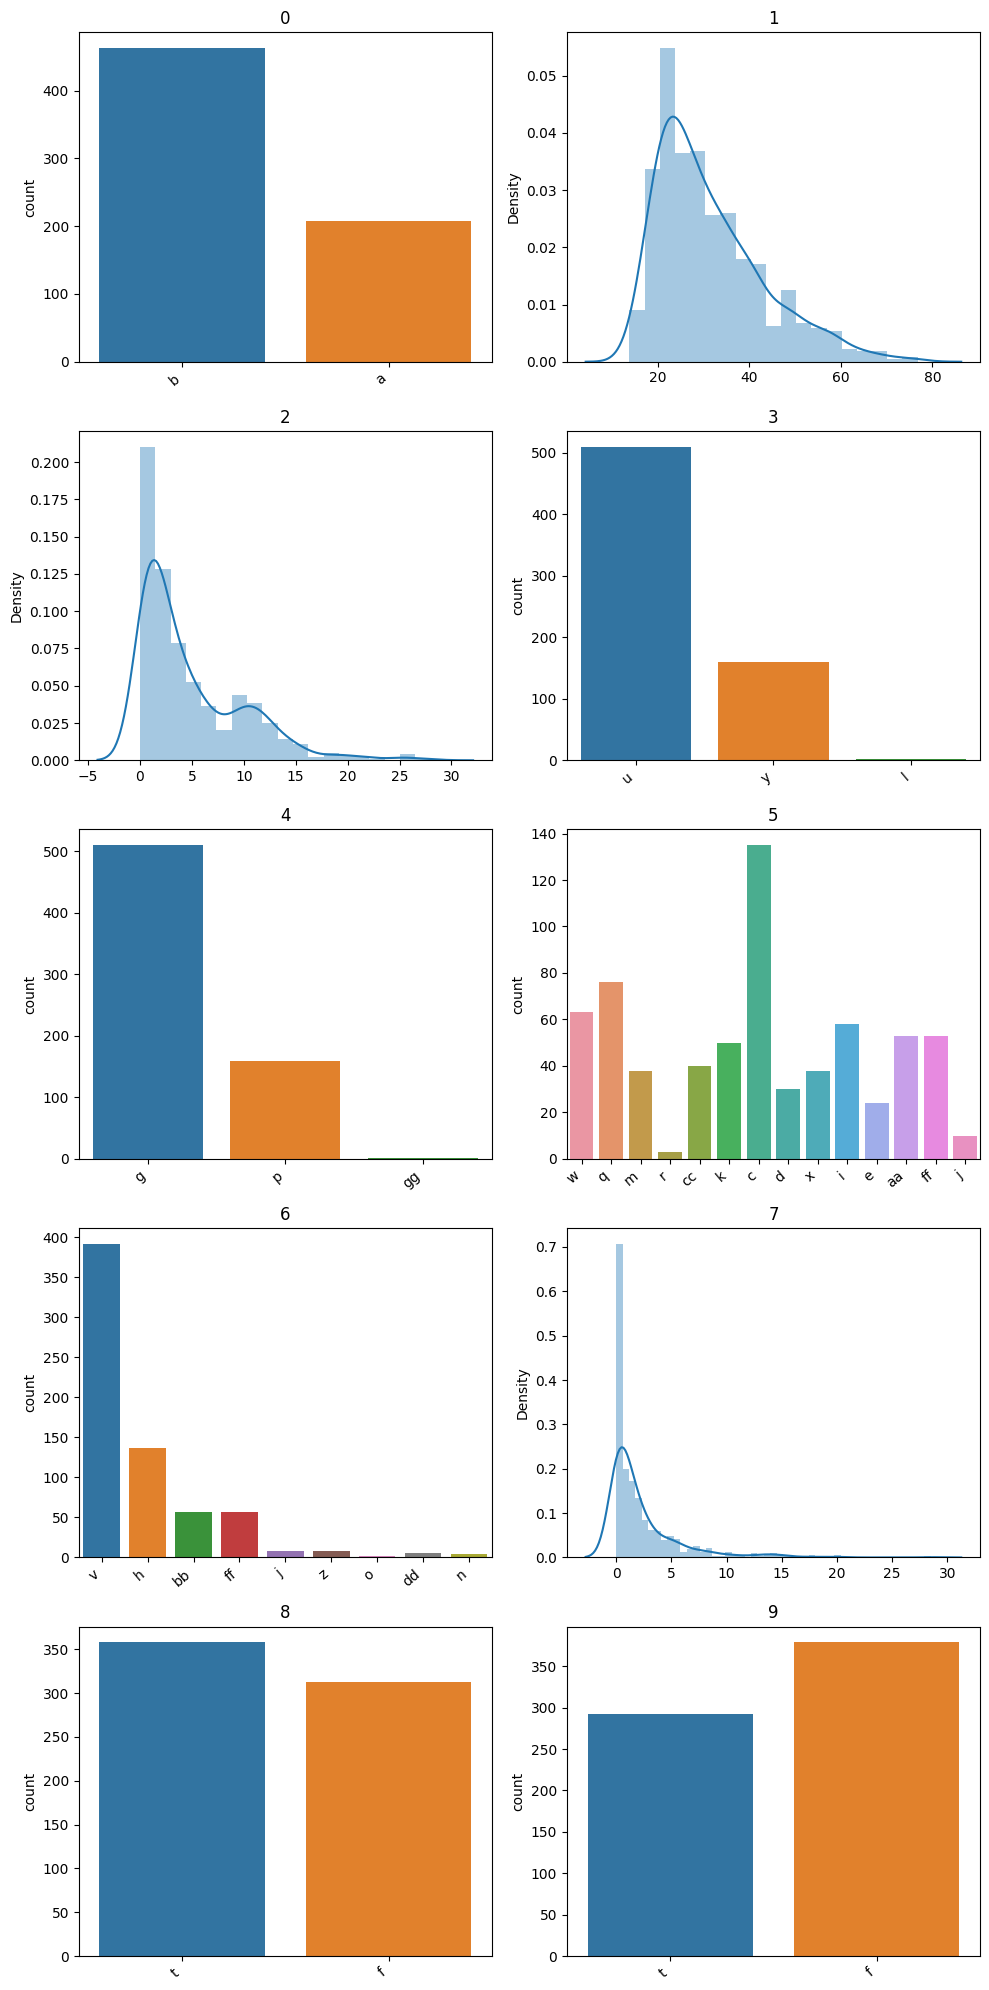

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = [0, 3, 4, 5, 6, 8, 9, 11, 12, 15]

# plot the distribution of each feature (for numerical features show the distribution of the values)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))
for i, ax in enumerate(axes.flatten()):
    if i in cat_cols:
        sns.countplot(x=i, data=data, ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    else:
        sns.distplot(data[i], ax=ax)
    ax.set_title(data.columns[i])
    ax.set_xlabel('')

plt.tight_layout()

C:\Users\kappa\AppData\Local\Temp\ipykernel_19220\2287508934.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = data.drop(cat_cols, axis=1).corr()


<Axes: >

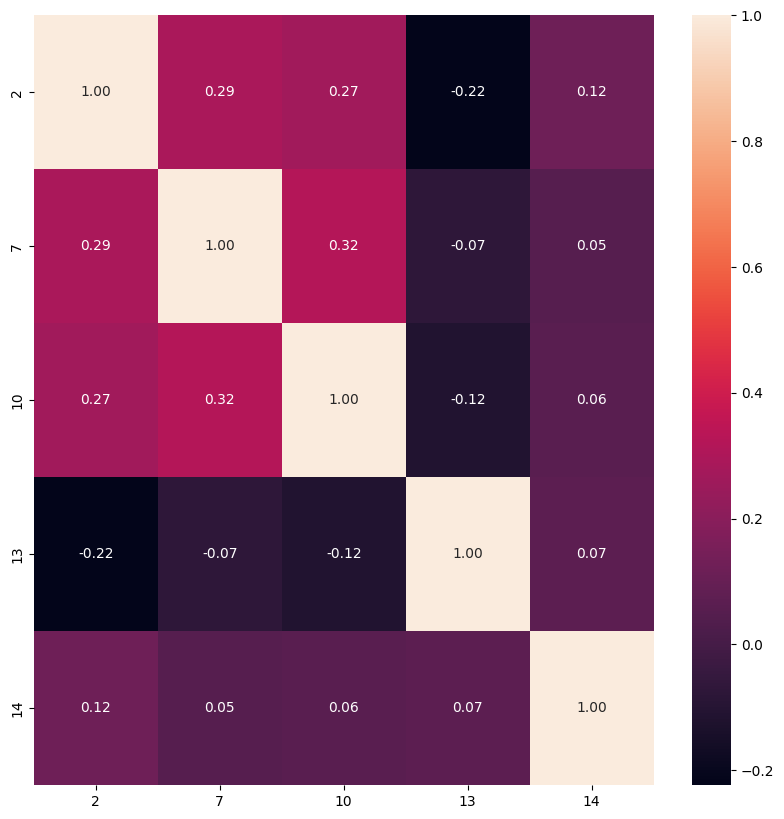

In [96]:
# show the correlation matrix; select only numerical features
data_corr = data.drop(cat_cols, axis=1).corr()
plt.figure(figsize=(10, 10))
sns.heatmap(data_corr, annot=True, fmt=".2f")

3. Kodowanie wartości nominalnych. Przeanalizuj, jak klasyfikatory radzą sobie z
reprezentacją cech w postaci nominalnej oraz w kodowaniu one hot encoding.
Które reprezentacje cech są dopuszczalne dla każdego z klasyfikatorów? Jeśli
obie reprezentacje są dopuszczalne, która reprezentacja będzie bardziej
efektywna?

In [99]:
# one hot encode categorical variables, use OneHotEncoder from sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe.fit(data[cat_cols])
ohe.categories_

# transform the categorical variables
data_ohe = ohe.transform(data[cat_cols])
data_ohe.shape

# create a new dataframe with the one hot encoded variables
data_ohe = pd.DataFrame(data_ohe, columns=ohe.get_feature_names_out())
data_ohe.head()


c:\Users\kappa\PycharmProjects\pum\.venv\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,x0_a,x0_b,x1_l,x1_u,x1_y,x2_g,x2_gg,x2_p,x3_aa,x3_c,...,x5_t,x6_f,x6_t,x7_f,x7_t,x8_g,x8_p,x8_s,x9_+,x9_-
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


4. Przeprowadź skalowanie cech. Najczęściej stosuje się jedno z dwóch podejść:
- normalizacja (ang. min-max scaling)
- standaryzacja (ang. standarization)

Zbadaj, jak skalowanie cech wpływa na dokładność klasyfikatorów k-NN oraz
lasów losowych.

In [ ]:
# scale 